In [142]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [143]:
df_tag = pd.read_csv('Dataset Foodboost/tags.csv').drop(['Unnamed: 0', 'recipe'], axis=1)
tags = df_tag['tag'].unique()
tags

array(['hollands', 'gebak', 'sinterklaas', 'sinterklaasavond', 'oven',
       'vooraf te maken', 'lactosevrij', 'thais', 'aziatisch', 'curry',
       'hoofdgerecht', 'koken', 'glutenvrij', 'frans', 'wrap',
       'borrelhapje', 'borrel', 'kerst', 'oud &amp; nieuw', 'traktatie',
       'pasen', 'indonesisch', 'verjaardag', 'wat eten we vandaag',
       'slank', 'mexicaans', 'saus/dressing', 'bijgerecht', 'vegetarisch',
       'europees', 'bakken', 'chinees', 'frituren', 'italiaans', 'pasta',
       'snel', 'stamppot', '5-ingrediënten', 'ontbijt', 'soep',
       'maaltijdsoep', 'budget', 'couscous', 'zonder vlees/vis', 'rijst',
       'nagerecht', 'drankje zonder alcohol', 'halloween', 'gourmet',
       'veganistisch', 'stoven', 'noedels', 'gezond', 'pocheren',
       'in te vriezen', 'kinderrecepten', 'lunch', 'turks',
       'midden-oosters', 'tussendoortje', 'brood/sandwiches', 'stomen',
       'advertorial', 'kindergerecht', 'engels', 'brunch', 'noord-afrika',
       'salade', 'grill

In [144]:
df_recipes = pd.read_csv('Dataset Foodboost/recipes.csv')

# Drop de onnodige kolommen
df_recipes.drop([ 'Unnamed: 0', 'persons','time','calories','stars','url','image'], axis = 1, inplace = True)

# 200 Willekeurige recepten selecteren
df_recipes_lekker = df_recipes.sample(n=200)

# Deze recepten 1 keer gerund en deze 200 geprint om vervolgend handmatig aan te geven of ik die wel of niet lekker vind.
for i in range (200):
    
    random_recept = df_recipes_lekker.iloc[i]
    random_recept[0]
    #print("'" + random_recept[0] + "'" + ': ' + " ,")

lekker = {'Biefstuk met rodewijnsaus en ham': 1,
    'Plaatpizza met spruitjes en salami':  1,
'Zelfgemaakte zalmburger met bietensalade':  1,
'Unicorn smoothie':  0,
'Rodekool met spekjes':  0,
'Grissini met sesam':  0,
'Sticky speklapjes met rozemarijnaardappeltjes':  0,
'Nasi met kip en zelfgemaakte boemboe':  1,
'Courgettetaart met haver fraîche':  0,
'Mexicaanse wraps met groente en gegrilde biefstuk':  1,
'Carpaccio-bonbon met kruidensalade':  1,
'Mojito met gember en jalapeño':  0,
'Couscous met gebakken kip, wortel, abrikozen en citroen ':  1,
'Wokmie met zoetzure omelet':  1,
'Gekleurde kidswafels ':  0,
'Witte-bonenpuree, Chinese kool en venkel-tijmworst':  0,
'Semifreddo met cantuccini':  0,
'Zomerrisotto met mozzarella-braadworstjes':  1,
'Witvis met notentopping, bloemkool puree en salsa':  1,
'Geurige maaltijdsoep met rijst en een eitje':  0,
'Pommes duchesses met zoete aardappel':  0,
'Farfalle met groenten en hüttenkäse':  0,
'Gegrilde vega-tomatenspiesjes met rodekool-broccolisalade':  0,
'Gestoofde gehaktballetjes met bladerdeeg':  1,
'Marshmallow-bananensplit met chocoladesaus uit een gourmetpannetje':  1,
'Stéphane Reynauds gestoofde sla':  0,
'Ui-prei-kapucijneromelet met bonenkruid':  0,
'Ovenaardappelen met kurkuma en romesco':  0,
'Lauwwarme noedelsalade met Japanse kip':  0,
'Paddenstoelensoep &amp; roomkaasballen':  0,
'Burgers met rode-uienjam':  1,
'Asperges met botersaus':  0,
'Geroosterde groenten met gorgonzola':  0,
'Gourmet-omelet met bosui en sesam':  1,
'Mexicaans stoofvlees met bonen':  1,
'Bietenhummus':  0,
'Opperdepop: kiphapje met wortel en doperwtjes 7-9 mnd':  1,
'Kleine tortillas met Hollandse Nieuwe':  1,
'Speltsalade met granaatappel en za’atar':  1,
'Vegaschnitzel met ratatouille uit de oven':  0,
'Gekruide rösti &amp; wortel met een zachtgekookt eitje':  1,
'Hartige popcorn':  0,
'Camembert met druiven van de BBQ ':  0,
'Open sandwich met worst en mosterd':  1,
'Pasta met zwarte bonen':  0,
'Artisjokdip':  0,
'Pittige gehaktballetjes met snelle bami':  1,
'Curryworstjes':  1,
'Gewokte bloemkool met rode curry':  0,
'Sushicado van Fooddeco':  0,
'Hummus in 15 minuten':  0,
'Fit Girl Codes kip-mangosalade':  1,
'Homemade friet met truffelmayo &amp; parmezaan van FrietHoes':  0,
'Saté van gedroogd fruit':  0,
'Broodpudding van fruit- noten- en rozemarijnbrood':  1,
'Vegastoof met gele paprika, broccoli &amp; basmatirijst':  0,
'Linzensoep met aardappel, prei en worst':  0,
'Linzenstoof met bloemkool en vegastukjes':  0,
'Linzenstoof met gepocheerde eieren':  0,
'Amuse van paté, spek en gekaramelliseerde sjalot':  0,
'Saté babi van de bbq':  1,
'Kaasfondue dips':  1,
'Lasagne':  1,
'Oventosti met vegagehackt en geitenkaas':  0,
'Eenpersoonscurry':  1,
'Bananen-kokoscake':  1,
'White Russian':  1,
'Carpaccio van tomaat met parmezaan en pijnboompitten':  1,
'Aziatische koolsalade':  1,
'Hele mosterdkip uit de oven':  0,
'Filetlapjes met geroosterde biet':  0,
'Wraps met krokante cajunkip, avocado &amp; citroencrème':  1,
'Thaise kokosnoedelsoep met garnalen':  0,
'Braadworst met uien-stroopjus':  1,
'Spaanse surf &amp; turfspiesjes met pittige tomatensaus':  1,
'Kokospannenkoekjes met tropisch fruit':  1,
'Spruitjes met peer':  0,
'Curry van bloemkool en broccoli':  0,
'Indiase curry met geroosterde bloemkool':  1,
'Geroosterde paprika met geitenkaas en pistache':  0,
'Sinaasappeltaart met eiwitschuim':  1,
'Krokante kaneelkrans':  1,
'Regenboogcarpaccio met pijnboompitten en parmaham':  0,
'Rijkgevulde groentebowl met tonijn &amp; pittige dressing':  0,
'Paprikaomelet met salade':  0,
'Tropische clafoutis met kokosmelk &amp; mango':  1,
'Vietnamese pho':  0,
'Zoete-aardappelfriet met vegaburgers':  0,
'Shichimi-zalm met aspergenoedels':  1,
'Thaise salade van gekneusde komkommers ':  0,
'Spekkoek met pisangroom':  1,
'Croque Buvette':  0,
'Hollandse rösti met sperziebonensalade':  0,
'Gegrilde kipdijfilet met rozemarijn':  1,
'Zoete-aardappelkoekjes met verse rozemarijn':  1,
'Volkorentoast met avocado &amp; eikruim':  1,
'Eipotjes met tomaten en spinazie':  1,
'Glutenvrije pizza met gerookte kip':  1,
'Bietentartaar met geitenkaas en gebakken kappertjes':  1,
'Boerenkoolstoof met chorizo':  1,
'Buddha-bowl met Chioggia-bietjes en bietenhummus':  0,
'Krokante schnitzel met zoete-aardappelgratin en broccoli':  1,
'Patatas bravas met biefstuk en broccoli':  1,
'Groene groentesalade met stroopdressing':  0,
'Gepofte biet met geitenkaas en walnoten':  0,
'Groenteomelet met sojasaus, champignons &amp; chili-mayosaus ':  0,
'Pulled chicken met chipotlesaus':  1,
'Goudbruine broc­co­li­-to­nijn­taart':  1,
'Patatas bravas':  1,
'Medaillons met avocadosalsa':  0,
'Zweedse gehaktballetjes met room':  1,
'Dunne crackers met ricotta-fetaspread en asperges':  1,
'Knapperige flowersprouts  ':  0,
'Mokka-havermout':  1,
'Pasta uit de oven met courgette':  1,
'Schelvis in ham met aardappelpuree en spinazie':  1,
'Lunchbowl met kikkererwten &amp; limoen-yoghurtdressing':  0,
'Garnalencocktail met aardappel en rucola':  1,
'Pompoenstoof':  0,
'Pasta met mosselen en lamsoren':  1,
'Spaghetti bolognese met rijkgevulde saus':  1,
'Spiegelei':  1,
'Gefrituurde augurkjes':  0,
'Snelle spaghetti met paddenstoelen en spekjes':  1,
'Gehaktspies met zelfgemaakte tzatziki':  1,
'Pizza bianca met rauwe parmaham':  0,
'Kip met tonijnsaus':  1,
'Tortillacracker met pompoen':  0,
'Biefstuk tagliata':  1,
'Warmgerookte zalm met pasta en tomatensaus':  1,
'Griekse yoghurt met appelcompote':  1,
'Kerstkip':  1,
'Wortel met witte kaas':  0,
'Piri piri drumsticks met tzatziki':  1,
'Traybake met vegetarische balletjes en ovengroenten':  0,
'Vissaté met pittige satésaus ':  0,
'Pad thai met peultjes en omelet':  0,
'Pasteitje kipragout met salade ':  1,
'Verse tagliolini met broccoli en venkelworst':  1,
'Pastasalade pesto met burrata ':  1,
'Crèmesoep van schorseneren':  0,
'Regenboogsalade met bramendressing':  0,
'Trifle met amandelkoekjes, bessencrème en honeycomb':  0,
'Smoothie van twee kleuren':  0,
'Kropsla-kruidensalade':  0,
'Couscous met pittige garnalen':  1,
'Pizzabaguettes met paprika en salami':  1,
'Gehaktballetjes met saus':  1,
'Gnocchi met hazelnoten in tomatensaus':  0,
'Gemberbier':  1,
'Mini-meatloafs met kwartelei':  1,
'Paprika-broodsalade':  1,
'Wortelpasta carbonara met tuinerwten':  0,
'Vega aardappelcurry met boontjes en roti':  0,
'Scharrelkipreepjes met gemengde groenten':  1,
'Visburger met wasabimayo':  0,
'Makkelijk borrelplank':  1,
'Pruimentaart':  0,
'Appel-spruitenstamppot met braadworst ':  1,
'Mediterrane visstoof met couscous':  1,
'Jennekes Tobleronetaart':  0,
'Atomic buffalo turds':  1,
'Bretons gehaktbrood':  1,
'Toast met serranoham &amp; zelfgemaakte knolselderijremoulade':  1,
'Kip met sinaasappel-hoisinsaus en rijst':  1,
'Maaltijdsoep met kikkererwten':  0,
'Crème brûlée van kokos':  1,
'Pannenkoekjes met zoet spiegelei':  1,
'Millionaires shortbread':  1,
'Volkorentortillachips met salsa van mango en limoen':  1,
'Chickslovefoods hutspotkoekjes':  0,
'Franse vissoep':  0,
'Piadina met artisjok, veldsla en ricotta':  1,
'Uienbloemen met kabeljauw':  1,
'Zomerse punch met appel en meloen':  1,
'Linzen-tomatenstoof met bloemkool':  0,
'Overnight ontbijtgranen met appel':  1,
'Lentequiche met salami, puntpaprika en kruiden':  1,
'Linzensalade met gegrilde groenten':  0,
'Kipburger met gebakken aardappel &amp; spinazie':  0,
'Pasta met tonijn, spinazie &amp; asperges':  1,
'Aubergine-paprikalasagne met romige kaassaus':  0,
'Rainbow quinoasalade met gegrilde kalkoen en amandelen van Dafne Schippers':  0,
'Volkorennachos met tomatensalsa en 30+ kaas':  0,
'Tonijn-tomatenstoof met knapperige boontjes':  1,
'Mexicaanse biercocktail met tomaat &amp; jalapeño':  1,
'Pappardelle met groene asperges en ham':  1,
'Snelle tajine met dadelstroop':  0,
'Chili dog':  0,
'Gefrituurd ijs met frambozencoulis':  0,
'Bloemkoolbodemquiche met groente en kokosmelk':  0,
'Orzo met kip en garnalen':  1,
'Flammkuchen met zalm en ui':  1,
'Croquetas':  0,
'Gebakken biet met rösti en slavink':  0,
'Tuinerwtensoep':  0,
'Paprika-tomatensalsa':  1,
'Meringuetaart met praliné en salted caramel':  1,
'Ierse stamp met bosui en waterkers':  1,
'Garnalencurry met spinazie':  1,
'Komkommersalade met gebakken chorizo':  1}

# Lijst van deze recepten omzetten in een nieuwe dataframe met recipe en lekker als kolom namen
lekker_recepten = pd.DataFrame(data=lekker.items())
lekker_recepten.rename(columns = {0:'recipe', 1:'lekker'}, inplace = True)
lekker_recepten

,recipe,lekker
0,Biefstuk met rodewijnsaus en ham,1
1,Plaatpizza met spruitjes en salami,1
2,Zelfgemaakte zalmburger met bietensalade,1
3,Unicorn smoothie,0
4,Rodekool met spekjes,0
...,...,...
196,Paprika-tomatensalsa,1
197,Meringuetaart met praliné en salted caramel,1
198,Ierse stamp met bosui en waterkers,1
199,Garnalencurry met spinazie,1


In [145]:
df_recipe_tag = pd.read_csv('Dataset Foodboost/tags.csv')
df_recipe_tag.drop_duplicates(subset= ['Unnamed: 0', 'tag'], keep="first", inplace=True)
df_recipe_tag

,Unnamed: 0,recipe,tag
0,0,Kruidnoten met choco-discodip,hollands
1,1,Kruidnoten met choco-discodip,gebak
2,2,Kruidnoten met choco-discodip,gebak
3,3,Kruidnoten met choco-discodip,sinterklaas
4,4,Kruidnoten met choco-discodip,sinterklaasavond
...,...,...,...
46035,46035,Pittige truffels,nagerecht
46036,46036,Biefstuk met rodewijnsaus en ham,snel
46037,46037,Biefstuk met rodewijnsaus en ham,mediterraan
46038,46038,Biefstuk met rodewijnsaus en ham,hoofdgerecht


In [146]:
for tag in tags:
    lekker_recepten[tag] = 0
lekker_recepten

/tmp/ipykernel_19347/2564144844.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lekker_recepten[tag] = 0
/tmp/ipykernel_19347/2564144844.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lekker_recepten[tag] = 0
/tmp/ipykernel_19347/2564144844.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
 

,recipe,lekker,hollands,gebak,sinterklaas,sinterklaasavond,oven,vooraf te maken,lactosevrij,thais,...,mealprep,slowcooker,oost-europees,valentijnsdag,zuid-afrikaans,koreaans,kidsfavoriet,diner,lente,jamie oliver
0,Biefstuk met rodewijnsaus en ham,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Plaatpizza met spruitjes en salami,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Zelfgemaakte zalmburger met bietensalade,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Unicorn smoothie,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Rodekool met spekjes,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Paprika-tomatensalsa,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,Meringuetaart met praliné en salted caramel,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,Ierse stamp met bosui en waterkers,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199,Garnalencurry met spinazie,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
for i, row in df_recipe_tag.iterrows():
    if row['tag'] in tags:
        recipe = row['recipe']
        tag = row['tag']
        lekker_recepten.loc[lekker_recepten['recipe'] == recipe, tag] = 1
lekker_recepten

,recipe,lekker,hollands,gebak,sinterklaas,sinterklaasavond,oven,vooraf te maken,lactosevrij,thais,...,mealprep,slowcooker,oost-europees,valentijnsdag,zuid-afrikaans,koreaans,kidsfavoriet,diner,lente,jamie oliver
0,Biefstuk met rodewijnsaus en ham,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Plaatpizza met spruitjes en salami,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Zelfgemaakte zalmburger met bietensalade,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Unicorn smoothie,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Rodekool met spekjes,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Paprika-tomatensalsa,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,Meringuetaart met praliné en salted caramel,1,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
198,Ierse stamp met bosui en waterkers,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199,Garnalencurry met spinazie,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [148]:
y = lekker_recepten["lekker"] #Target variable
y

0      1
1      1
2      1
3      0
4      0
      ..
196    1
197    1
198    1
199    1
200    1
Name: lekker, Length: 201, dtype: int64

In [149]:
tags = list(lekker_recepten.columns[2:])
tags

X = lekker_recepten[tags]
X

,hollands,gebak,sinterklaas,sinterklaasavond,oven,vooraf te maken,lactosevrij,thais,aziatisch,curry,...,mealprep,slowcooker,oost-europees,valentijnsdag,zuid-afrikaans,koreaans,kidsfavoriet,diner,lente,jamie oliver
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Creating the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Precision Score
precision = precision_score(y_test, y_pred)
print("Precision Score:", precision)

# Recall Score
recall = recall_score(y_test, y_pred)
print("Recall Score:", recall)


Accuracy: 0.5737704918032787
Confusion Matrix:
 [[25  4]
 [22 10]]
Precision Score: 0.7142857142857143
Recall Score: 0.3125


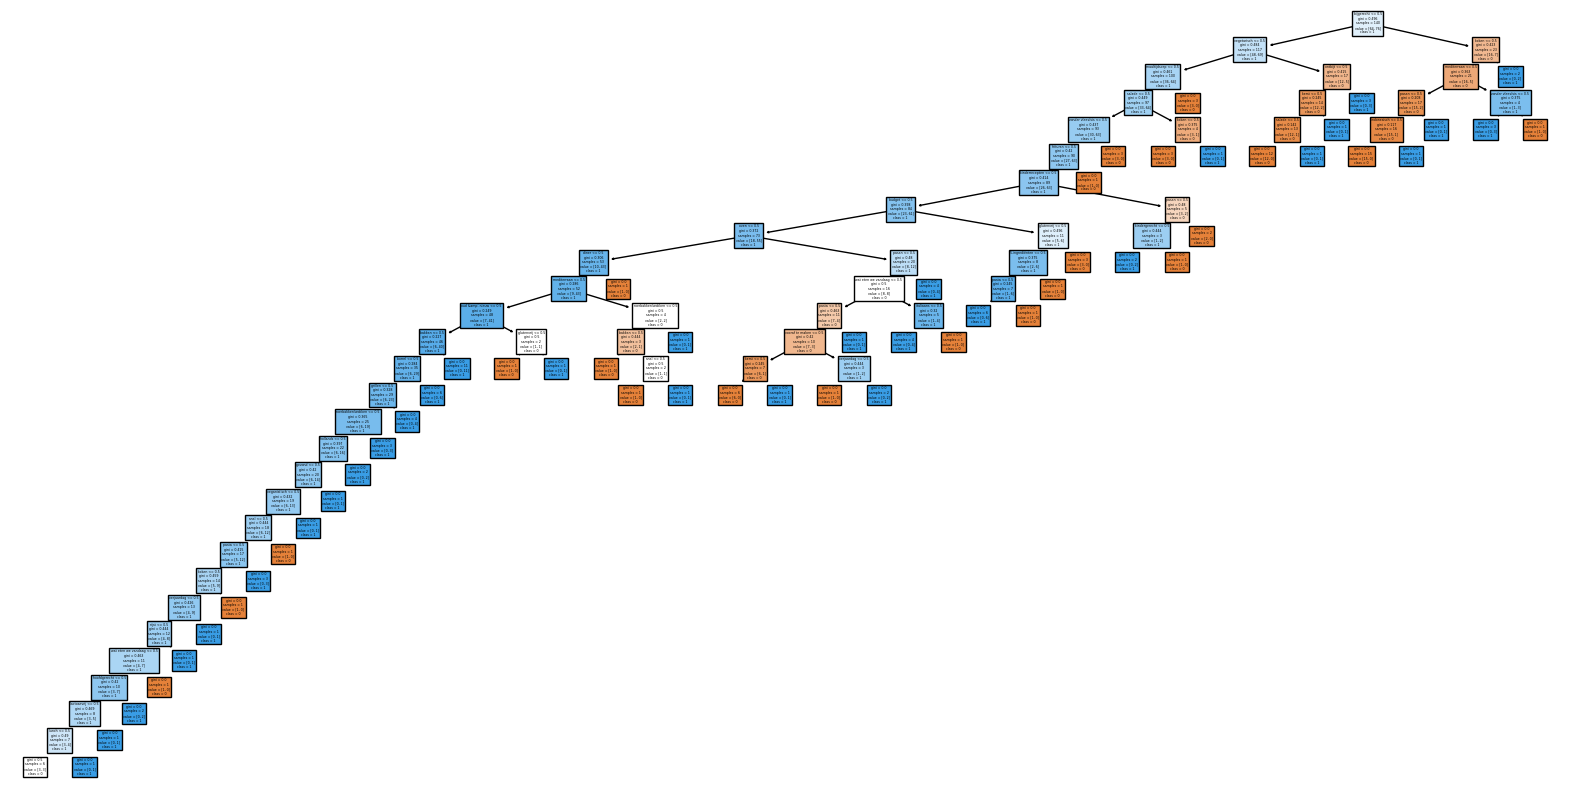

In [163]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=tags, class_names=['0', '1'])
plt.show()